In [1]:
import pandas as pd

Cargar el archivo CSV en un DataFrame

In [2]:
df = pd.read_csv("winequality-red.csv")

Mostrar las primeras filas del DataFrame

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

Calcular la matriz de correlación

In [5]:
correlation_matrix = df.corr()

Visualizar la matriz de correlación utilizando un mapa de calor

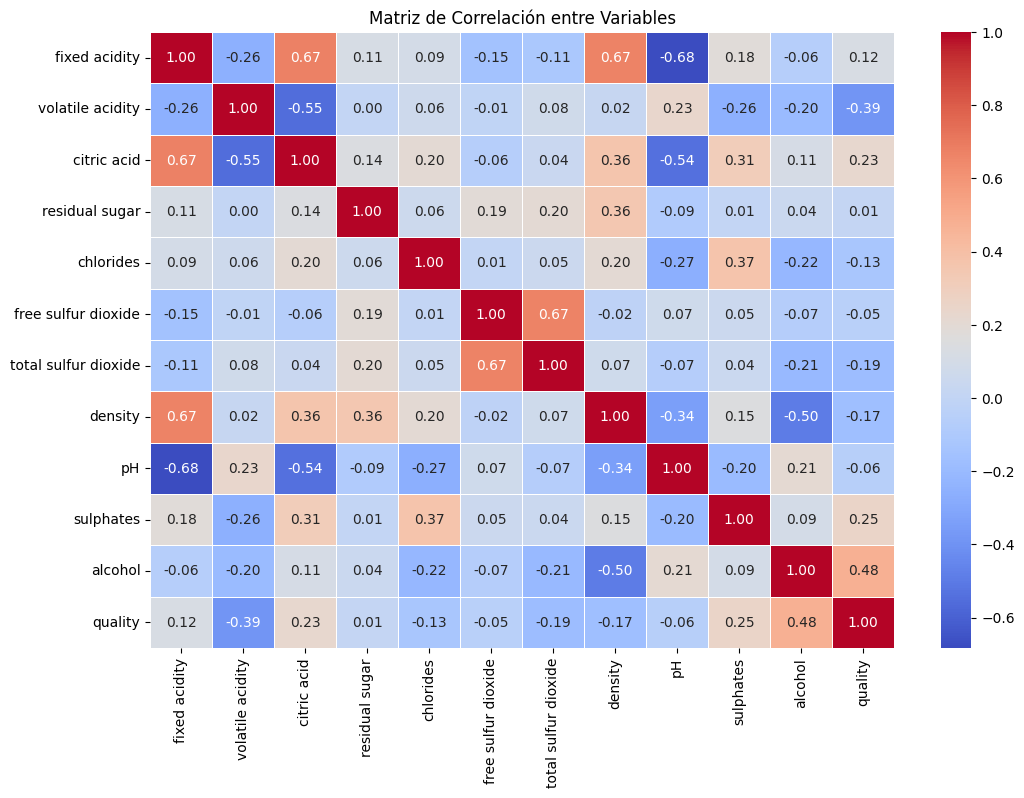

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

Graficar la relación entre fixed acidity y citric acid

Text(0.5, 1.0, 'Fixed Acidity vs. Citric Acid')

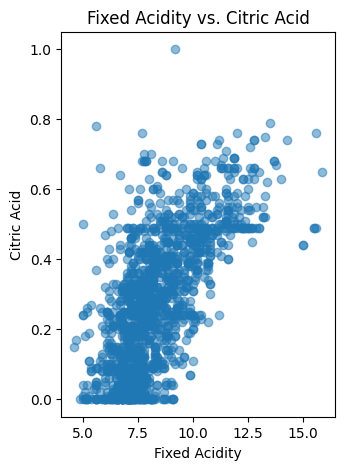

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['fixed acidity'], df['citric acid'], alpha=0.5)
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.title('Fixed Acidity vs. Citric Acid')

Graficar la relación entre fixed acidity y density

Text(0.5, 1.0, 'Fixed Acidity vs. Density')

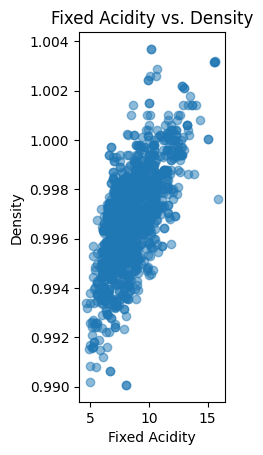

In [8]:
plt.subplot(1, 3, 2)
plt.scatter(df['fixed acidity'], df['density'], alpha=0.5)
plt.xlabel('Fixed Acidity')
plt.ylabel('Density')
plt.title('Fixed Acidity vs. Density')

Graficar la relación entre fixed acidity y pH

Text(0.5, 1.0, 'Fixed Acidity vs. pH')

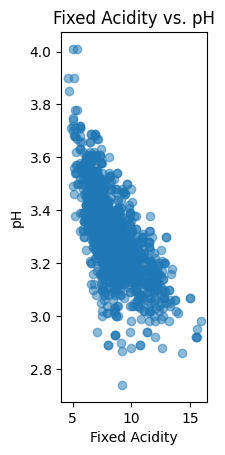

In [9]:
plt.subplot(1, 3, 3)
plt.scatter(df['fixed acidity'], df['pH'], alpha=0.5)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Fixed Acidity vs. pH')

In [10]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Graficar diagramas de caja para todas las variables

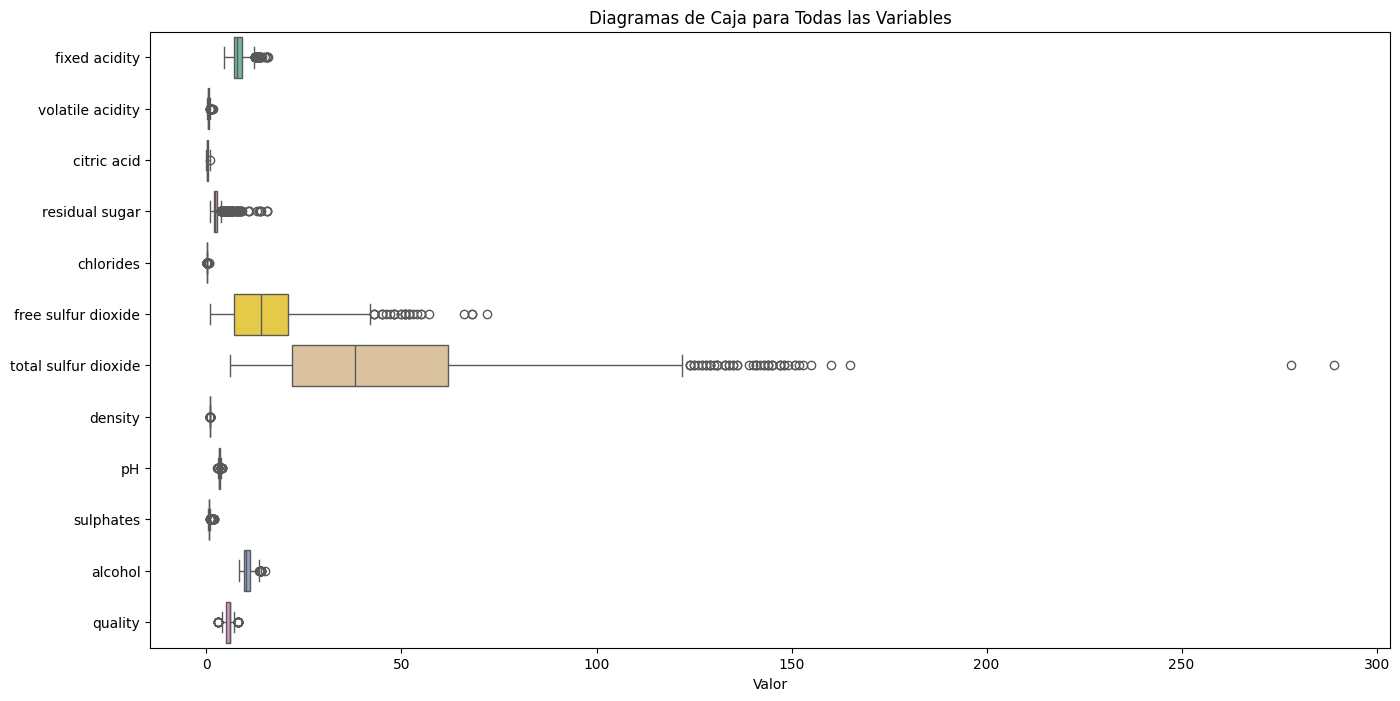

In [11]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Diagramas de Caja para Todas las Variables')
plt.xlabel('Valor')
plt.show()

Verificar si hay valores faltantes

In [12]:
missing_values = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler

Inicializar el escalador

In [14]:
scaler = StandardScaler()

Escalar todas las variables excepto la variable objetivo 'quality'

In [15]:
df_scaled = df.drop('quality', axis=1)  # Excluir la columna 'quality'
df_scaled = scaler.fit_transform(df_scaled)

Convertir el array escalado de vuelta a un DataFrame

In [16]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])  # Excluir la columna 'quality'

Agregar la columna 'quality' al DataFrame escalado

In [17]:
df_scaled['quality'] = df['quality']

Mostrar las primeras filas del DataFrame escalado

In [18]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


Calcular la mediana de cada columna

In [19]:
column_medians = df.median()

Definir la función de imputación

In [20]:
def impute_outliers_with_median(series):
    median = column_medians[series.name]
    lower_limit = median - 1.5 * series.std()
    upper_limit = median + 1.5 * series.std()
    series = series.mask((series < lower_limit) | (series > upper_limit), median)
    return series

Aplicar la imputación a todas las columnas del DataFrame

In [21]:
df_imputed = df.apply(impute_outliers_with_median)

Mostrar las primeras filas del DataFrame imputado

In [22]:
df_imputed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.52,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,7.9,0.28,0.26,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Dividir el conjunto de datos en características (X) y la variable objetivo (y)

In [24]:
X = df_imputed.drop('quality', axis=1)
y = df_imputed['quality']

Dividir el conjunto de datos en entrenamiento y prueba

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inicializar el modelo de árbol de decisión

In [26]:
clf = DecisionTreeClassifier(random_state=42)

Entrenar el modelo de árbol de decisión

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Obtener la importancia de las características

In [28]:
feature_importances = clf.feature_importances_

Mostrar la importancia de las características

In [29]:
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Importancia de las características:")
print(feature_importances_df)

Importancia de las características:
                 Feature  Importance
10               alcohol    0.154943
1       volatile acidity    0.108484
0          fixed acidity    0.104344
9              sulphates    0.103943
4              chlorides    0.096378
6   total sulfur dioxide    0.092434
7                density    0.088738
5    free sulfur dioxide    0.076887
3         residual sugar    0.075376
8                     pH    0.052961
2            citric acid    0.045512


In [30]:
from sklearn.model_selection import train_test_split

Dividir el conjunto de datos en entrenamiento y prueba

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mostrar el tamaño de los conjuntos de entrenamiento y prueba

In [32]:
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (1279, 11)
Tamaño del conjunto de prueba: (320, 11)


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

Inicializar el modelo de árbol de decisión

In [34]:
clf = DecisionTreeClassifier(random_state=42)

Entrenar el modelo de árbol de decisión en el conjunto de entrenamiento

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Predecir las etiquetas en el conjunto de prueba

In [36]:
y_pred = clf.predict(X_test)

Calcular la precisión del modelo

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo en el conjunto de prueba:", accuracy)

Precisión del modelo en el conjunto de prueba: 0.571875


Mostrar el informe de clasificación

In [38]:
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Informe de clasificación:
              precision    recall  f1-score   support

           5       0.58      0.62      0.60       130
           6       0.57      0.54      0.55       148
           7       0.55      0.55      0.55        42

    accuracy                           0.57       320
   macro avg       0.57      0.57      0.57       320
weighted avg       0.57      0.57      0.57       320



In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Calcular la matriz de confusión

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)

Visualizar la matriz de confusión

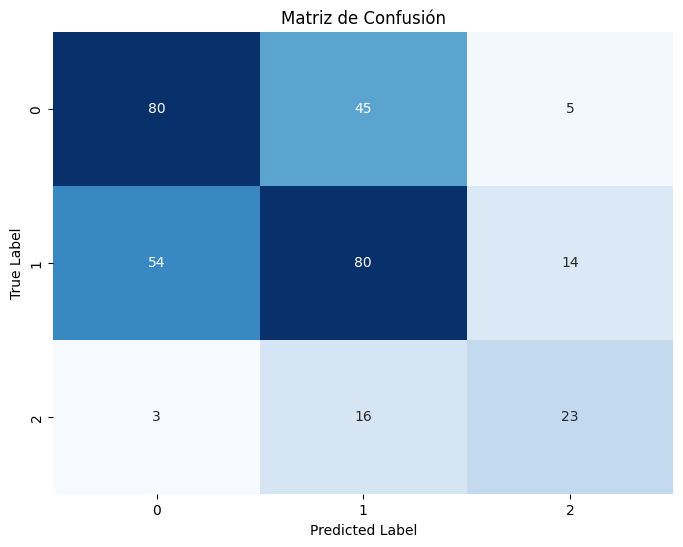

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()